In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(1021)

In [3]:
df = pd.read_csv("basketball_stat.csv")
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [4]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

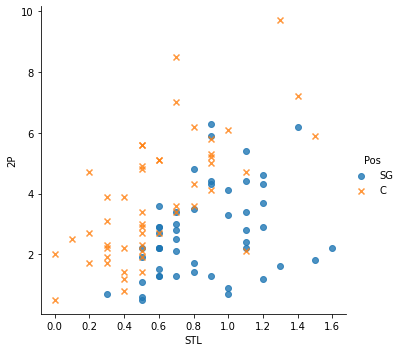

In [6]:
sns.lmplot('STL', '2P', data = df, hue = 'Pos', markers = ['o', 'x'], fit_reg = False)

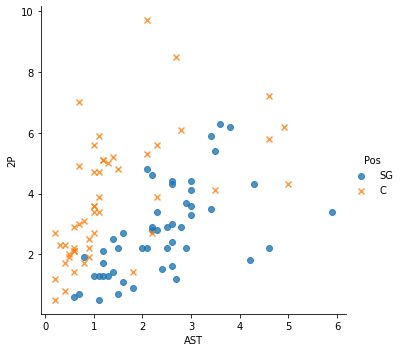

In [7]:
sns.lmplot('AST', '2P', data = df, hue = 'Pos', markers = ['o', 'x'], fit_reg = False)

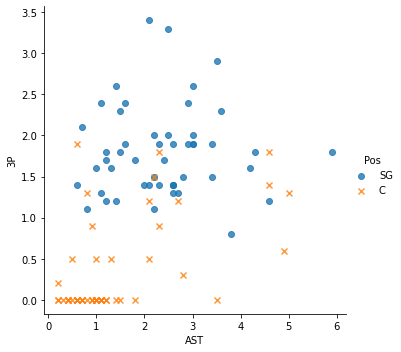

In [8]:
sns.lmplot('AST', '3P', data = df, hue = 'Pos', markers = ['o', 'x'], fit_reg = False)

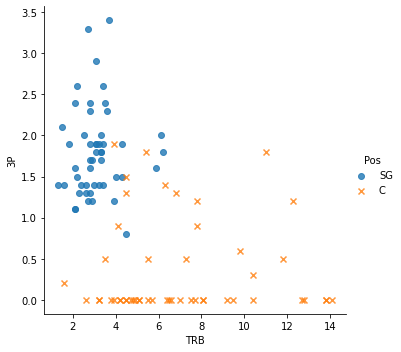

In [9]:
sns.lmplot('TRB', '3P', data = df, hue = 'Pos', markers = ['o', 'x'], fit_reg = False)

In [10]:
df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True)

In [11]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df, test_size = 0.2)# [트레이닝데이터프레임(80%), 테스트데이터프레임(20%)]

In [14]:
train.shape
test.shape

(20, 5)

In [15]:
train.to_csv("basketball_train.csv", index = None)
test.to_csv("basketball_test.csv", index = None)

In [16]:
# 최적의 k값?
# k = 3 ~ 학습데이터의 절반(maxKRange) 크기

maxKRange = train.shape[0]//2
kList = []
for i in range(3, maxKRange, 2) : # 이진분류, 동점 고려
    kList.append(i)

In [17]:
# 교차검증(cross-validation)을 k가 3일때 ~ k가 39일때까지 반복하면서
# train : 80건 / 10 fold = 8건씩 * 10개 폴드
# 1번째 폴드(테스트), 2번째 ~ 10번째 폴드(트레이닝) -> 모델 => 정확도(80%)
# 2번째 폴드(테스트), 1번째, 3 ~ 10번째 폴드(트레이닝) -> 모델 => 정확도(85%)
# ...
# 10번째 폴드(테스트), 1 ~ 9번째 폴드(트레이닝) -> 모델 => 정확도(90%)
# 전체 정확도의 평균 : 최종 성능(k = 3, 5, 7, ..., 39)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [18]:
train.head()
xTrain = train[['3P', 'TRB', 'BLK']]
yTrain = train[['Pos']]

In [33]:
xTrain.shape
yTrain.shape
yTrain.values.ravel() # 1차원으로 변경

array(['SG', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'C',
       'C', 'C', 'SG', 'C', 'C', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C',
       'C', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'SG',
       'C', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'SG',
       'C', 'SG', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C',
       'C', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'C',
       'SG', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG'], dtype=object)

In [30]:
cross_val_scores = []
for k in kList :
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, xTrain, yTrain.values.ravel(), cv = 10, scoring = 'accuracy')
    cross_val_scores.append(scores.mean())
cross_val_scores

[0.9375,
 0.9,
 0.9375,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8625,
 0.8625,
 0.875,
 0.85,
 0.85,
 0.8375,
 0.825,
 0.825]

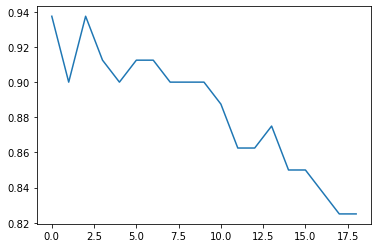

In [31]:
plt.plot(cross_val_scores)

In [32]:
k = kList[cross_val_scores.index(max(cross_val_scores))]
print("최적의 k = "+str(k)) # 또는 7, 9일떄 최적임

최적의 k = 3


In [34]:
### 3점슛과 블로킹 데이터로 포지션 예측하기 ###
# test
knn = KNeighborsClassifier(n_neighbors = k)

xTrain = train[['3P', 'BLK']]
yTrain = train['Pos']

knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

In [36]:
test.head()

,Player,Pos,3P,TRB,BLK
90,Tristan Thompson,C,0.0,9.2,1.1
45,Buddy Hield,SG,1.8,3.3,0.1
85,Marreese Speights,C,1.3,4.5,0.5
89,Klay Thompson,SG,3.4,3.7,0.5
67,Ben McLemore,SG,1.1,2.1,0.1


In [39]:
pred = knn.predict(test[['3P', 'BLK']]) # 포지션 예측

In [41]:
test[['Pos']] # 정답

# pd.DataFrame({"예측" : pred, "정답" : test[['Pos']].values.ravel()})
pd.DataFrame({"예측" : pred, "정답" : test['Pos']})

,예측,정답
90,C,C
45,SG,SG
85,SG,C
89,SG,SG
67,SG,SG
3,C,C
55,SG,SG
54,SG,C
50,C,C
79,SG,SG


In [42]:
from sklearn.metrics import accuracy_score

In [45]:
print("정확도:"+str(accuracy_score(test['Pos'], pred)))

정확도:0.85


In [ ]:
# 3점슛, 블로킹, 리바운드(3개 특징) -> 예측 => 코드&정확도 카페 제출